# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Preprocessing

In [2]:
# loading the csv data into pandas dataframe

house = pd.read_csv('Housing.csv')

In [3]:
# first 5 rows of the dataset

house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# number of rows and columns in the dataset

house.shape

(545, 13)

In [5]:
# missing values in the dataset

house.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Handling Outliers

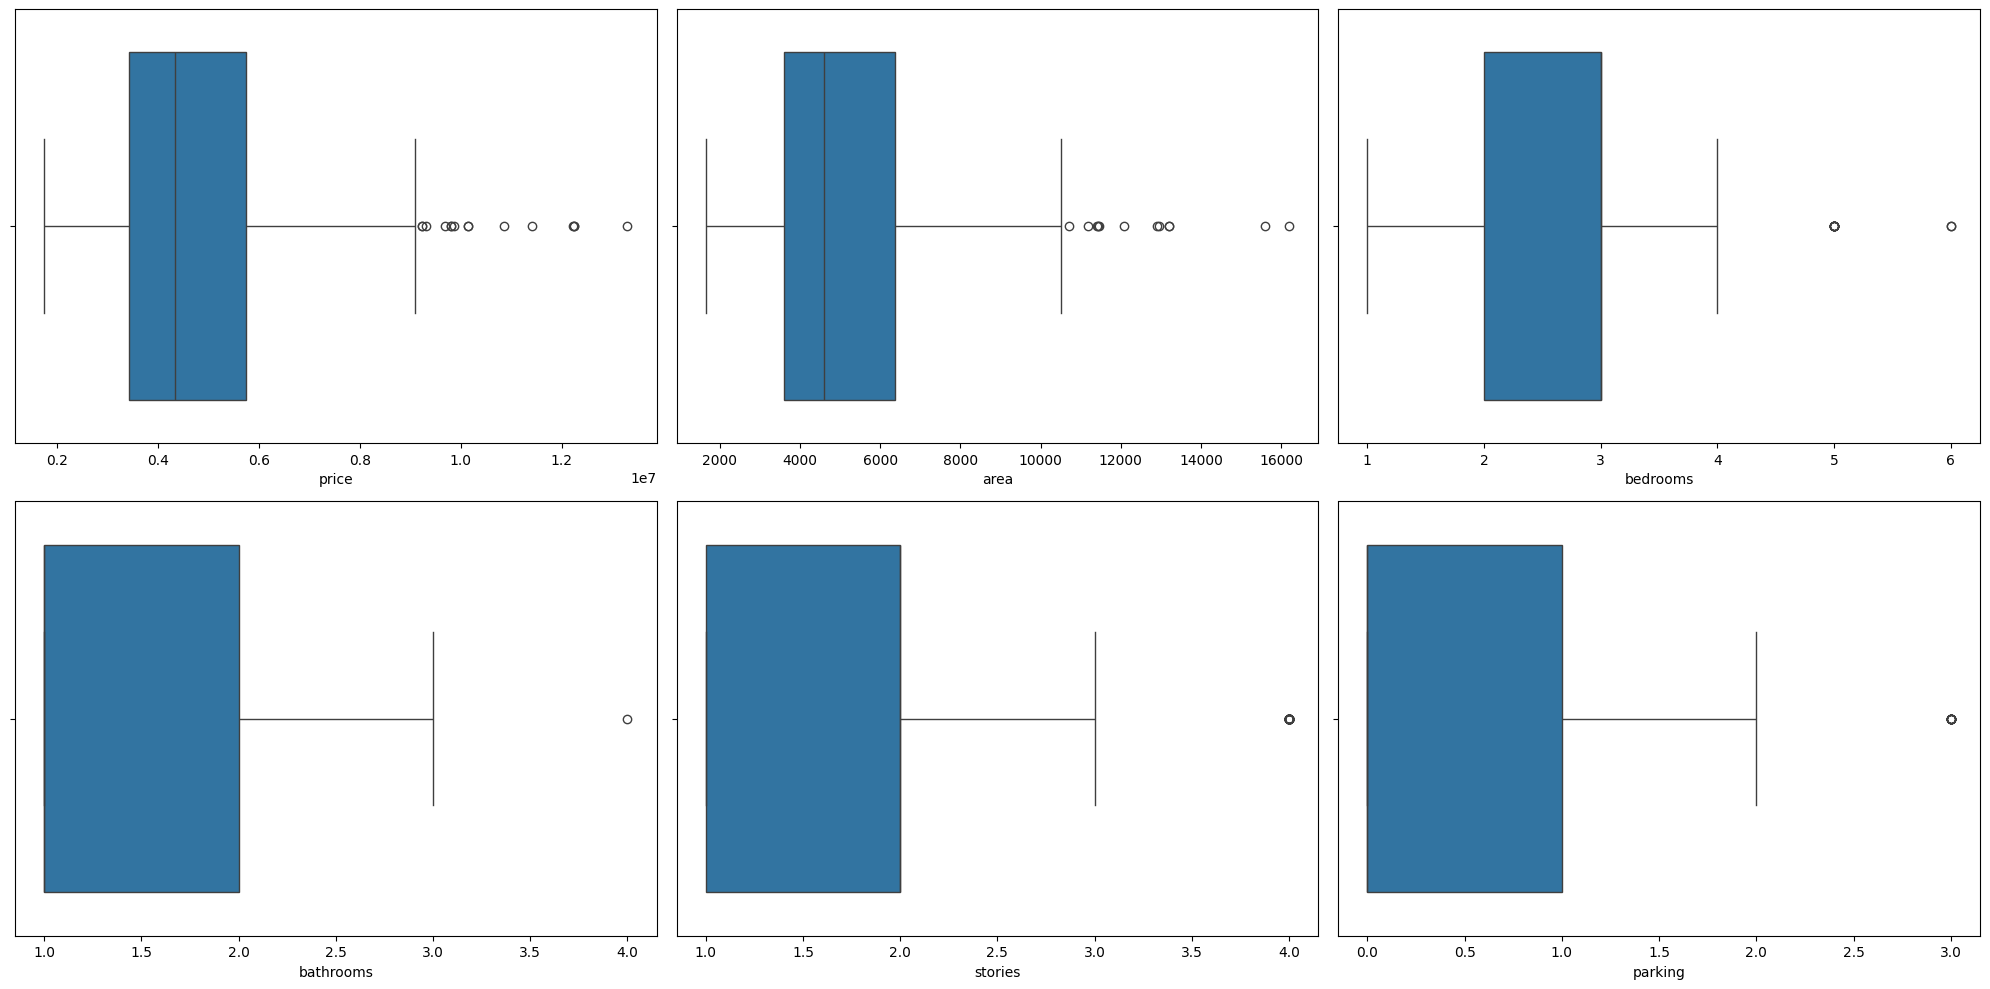

In [7]:
# identifying outliers in all the numeric features using boxplot

numerical_cols = house.select_dtypes(['int']).columns.tolist()

num_rows= 2
num_cols= (len(numerical_cols) + num_rows - 1)//num_rows

plt.figure(figsize= (20,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(num_rows, num_cols, i+1)
  sns.boxplot(house[col], orient = 'h')
plt.tight_layout()
plt.show()

- Price and area feature have most number of outliers
- Outliers in bedrooms, bathroms, stories and parking can be ignored

In [8]:
# removing outliers in price feature

Q1 = house['price'].quantile(0.25)
Q3 = house['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

house.loc[(house['price'] <= lower_bound),'price'] = lower_bound
house.loc[(house['price'] >= upper_bound),'price']= upper_bound

<Axes: xlabel='price'>

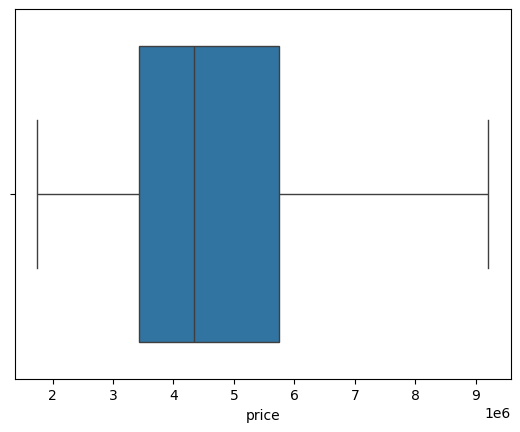

In [9]:
sns.boxplot(house['price'], orient = 'h')

In [10]:
# removing outliers in area feature

Q1 = house['area'].quantile(0.25)
Q3 = house['area'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


house.loc[(house['area'] <= lower_bound),'area'] = lower_bound
house.loc[(house['area'] >= upper_bound),'area']= upper_bound

<Axes: xlabel='area'>

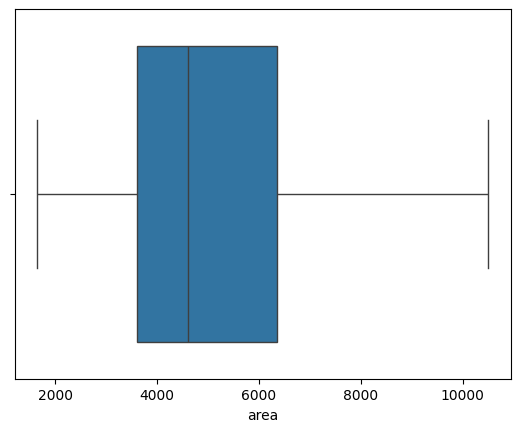

In [11]:
sns.boxplot(house['area'], orient = 'h')

In [12]:
# checking correlation between all the numeric independent and dependent features

corr = house.select_dtypes(['int']).corr()

<Axes: >

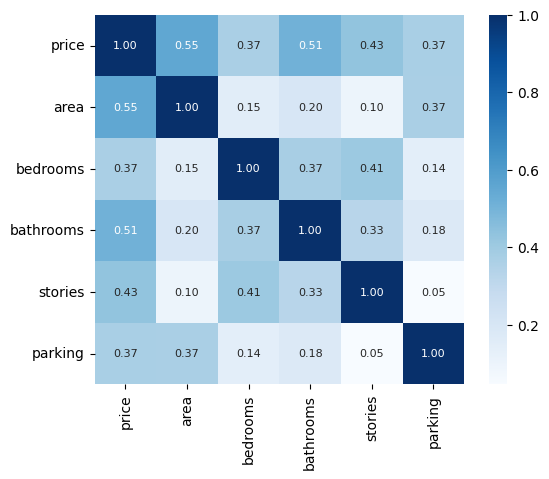

In [13]:
sns.heatmap(corr, cbar= True, square= True, fmt = '.2f', annot= True, annot_kws= {'size':8}, cmap= 'Blues')

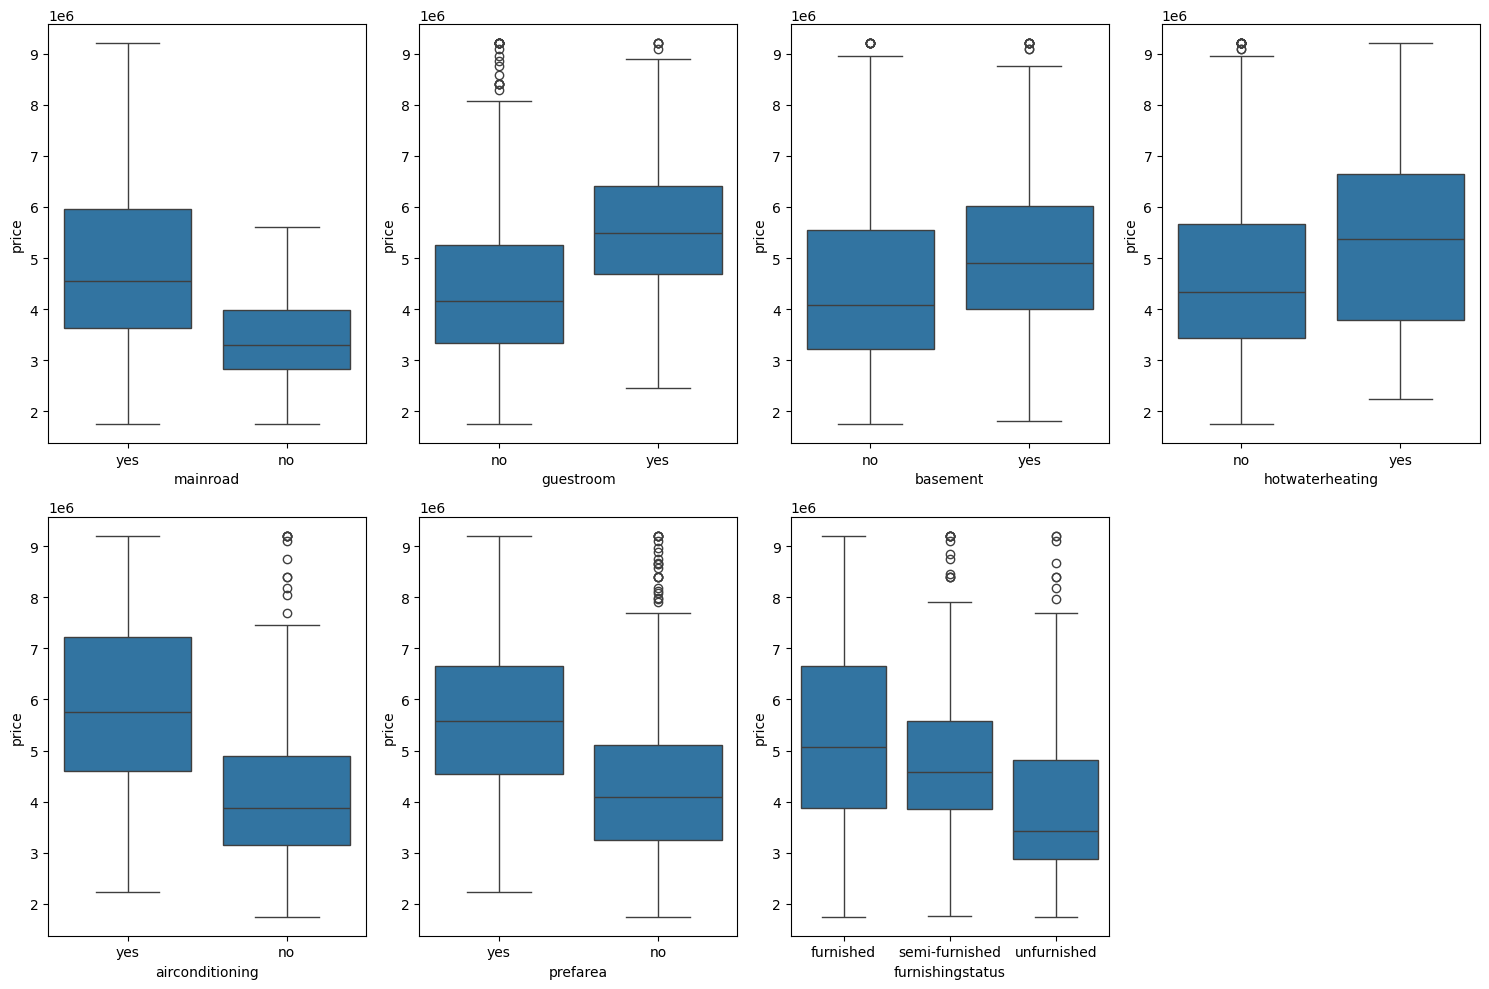

In [14]:
# checking relation between price (target) feature and all the categorical features

categorical_columns = house.select_dtypes(['object']).columns.tolist()

num_rows = 2
num_cols = (len(categorical_columns) + num_rows - 1) // num_rows

plt.figure(figsize= (15,10))
for i, col in enumerate(categorical_columns):
  plt.subplot(num_rows, num_cols, i+1)
  sns.boxplot(x= house[col], y= house['price'])
plt.tight_layout()
plt.show()

# Encoding

In [15]:
# converting categorical features into numerical features using label encoder

features_to_encode= ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

le = LabelEncoder()

for i in features_to_encode:
  house[i] = le.fit_transform(house[i])

In [16]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,9205000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9205000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,9205000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,9205000,7420,4,1,2,1,1,1,0,1,2,0,furnished


yes --> 1

no --> 0

In [17]:
# converting furnishingstatus feature usning one hot encoding

df_encoded = pd.get_dummies(house['furnishingstatus'], drop_first= True, dtype= 'int')

In [18]:
df_encoded

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


furnished --> 00

unfurnished --> 01

semi-furnished --> 10

In [19]:
# adding encoded features in house dataset

house = pd.concat([house, df_encoded], axis = 1)

In [20]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,9205000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,9205000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,9205000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,9205000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,9205000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [21]:
# dropping original furnishingstatus feature after encoding

house.drop('furnishingstatus', axis= 1, inplace= True)

In [22]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,9205000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,9205000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,9205000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,9205000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,9205000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Scaling

In [23]:
# scaling numerical feature using min max scaler

features_to_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

scaler = MinMaxScaler()

for i in features_to_scale:
  house[i] = scaler.fit_transform(house[[i]])

# Separating Data and Labels

In [24]:
X = house.drop('price', axis= 1)
Y = house['price']

In [25]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.651977,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.825989,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.938983,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.661017,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.651977,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,0.2,0.000000,0.000000,1,0,1,0,0,0.666667,0,0,1
541,0.084746,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,1,0
542,0.222599,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,1
543,0.142373,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,0


In [26]:
Y

,price
0,1.00000
1,1.00000
2,1.00000
3,1.00000
4,1.00000
...,...
540,0.00939
541,0.00230
542,0.00000
543,0.00000


# Training the model

In [27]:
# splitting the data into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42)

In [28]:
# training the model using Linear Regression

model = LinearRegression()

In [29]:
model.fit(X_train, Y_train)

LinearRegression()

# Evaluation

In [30]:
# Evaluation on training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = r2_score(X_train_prediction, Y_train)
training_data_MAE = mean_absolute_error(X_train_prediction, Y_train)
training_data_MSE = mean_squared_error(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
print('MAE of the training data : ', training_data_MAE)
print('MSE of the training data : ', training_data_MSE)

Accuracy score of the training data :  0.5535724746583388
MAE of the training data :  0.0927298753045039
MSE of the training data :  0.015432625418195726


In [31]:
# Evaluation on testing data

X_test_prediction = model.predict(X_test)
test_data_accuracy = r2_score(X_test_prediction, Y_test)
test_data_MAE = mean_absolute_error(X_test_prediction, Y_test)
test_data_MSE = mean_squared_error(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)
print('MAE of the test data : ', test_data_MAE)
print('MSE of the test data : ', test_data_MSE)

Accuracy score of the test data :  0.4089057769128507
MAE of the test data :  0.11830028353578348
MSE of the test data :  0.023248436787439923


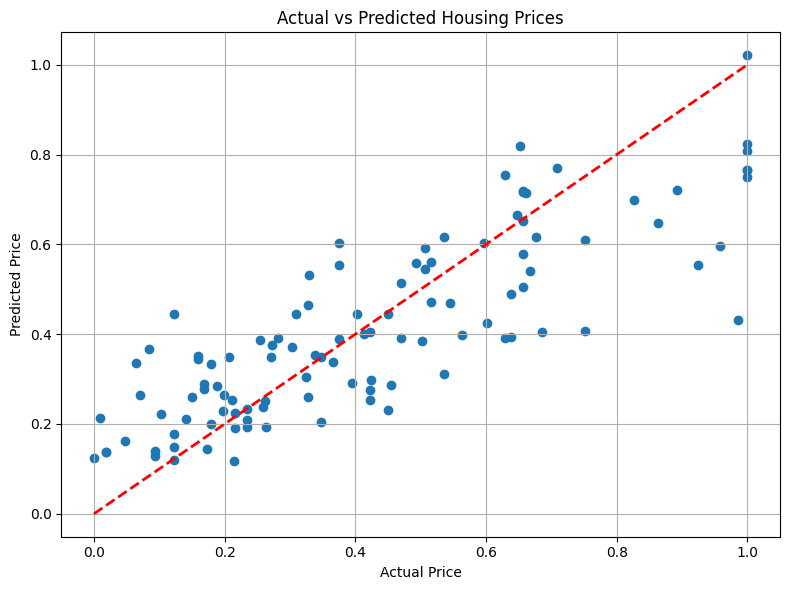

In [40]:
# plot a scatter plot for the prediciton

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, X_test_prediction)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# residuals

residuals = Y_test - X_test_prediction
residuals

,price
316,-0.134605
77,-0.061122
360,0.070450
90,0.238298
493,-0.070668
...,...
15,0.554801
357,-0.078946
39,0.127459
54,0.140896


<Axes: xlabel='price', ylabel='Count'>

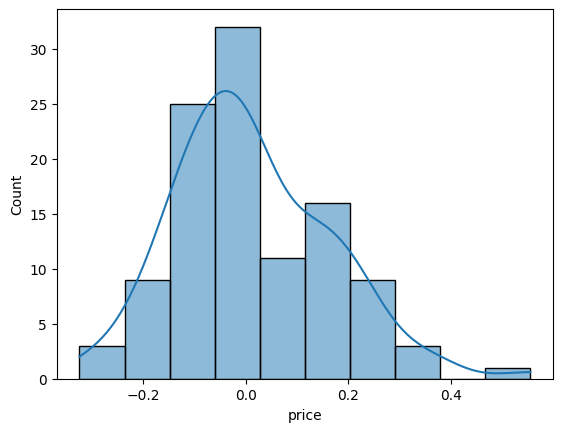

In [34]:
# plot the residuals

sns.histplot(residuals, kde= True)

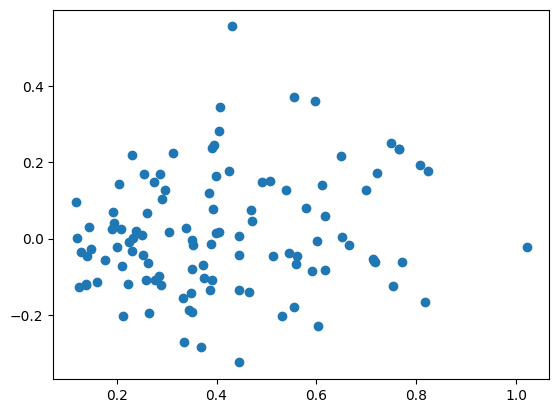

In [35]:
# Scatter plot w.r.t prediction and residuals
# Uniform Distribution

plt.scatter(X_test_prediction, residuals)

# Coefficients

In [36]:
coeffieients = pd.DataFrame({'Features' : X.columns, 'Coefficients' : model.coef_})

In [37]:
coeffieients.sort_values(by= "Coefficients", ascending= False)

,Features,Coefficients
2,bathrooms,0.393730
0,area,0.300906
3,stories,0.162912
8,airconditioning,0.100616
7,hotwaterheating,0.099150
10,prefarea,0.080057
9,parking,0.070146
1,bedrooms,0.053941
4,mainroad,0.050661
6,basement,0.049369
